In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import iplot
from plotly.figure_factory import create_annotated_heatmap
import plotly.express as px
import plotly.graph_objs as go

In [2]:
import warnings
import cufflinks as cf
import plotly.io as pio
pio.renderers.default='notebook'
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
warnings.filterwarnings('ignore')

## Шаг 1. Загрузка данных

In [3]:
df = pd.read_csv(r'D:\csv\game.csv')


In [4]:
def show(data):
    display(data.head())
    data.info()
    display(data.describe())
show(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


По этим данным, можно судить, что особых выбросов в них нет.

Данные можно будет привести к нижнему регистру в предобработке.


## Шаг 2. Предобработка данных

In [5]:
df.columns = df.columns.str.lower()

In [6]:
list_to_lower = ['name','platform','genre','rating']
for column in list_to_lower:
    df[column] = df[column].str.lower()

In [7]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,e
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,e
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,e
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name, year_of_release, genre - здесь пропуски просто удалю, их очень мало

tbd расшифровывается как to be determined, что означает, что оценок слишком мало, либо ее вообще нет. Значит мы можем заменить tbd пустым значением 

In [9]:
df.loc[df['user_score'] =='tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float64')

In [10]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [11]:
df['name'].dropna(inplace=True)
df['year_of_release'].dropna(inplace=True)
df['genre'].dropna(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
print(df['name'].unique())
print(df['platform'].unique())
df['genre'].unique()

['wii sports' 'super mario bros.' 'mario kart wii' ...
 'woody woodpecker in crazy castle 5' 'lma manager 2007'
 'haitaka no psychedelica']
['wii' 'nes' 'gb' 'ds' 'x360' 'ps3' 'ps2' 'snes' 'gba' 'ps4' '3ds' 'n64'
 'ps' 'xb' 'pc' '2600' 'psp' 'xone' 'wiiu' 'gc' 'gen' 'dc' 'psv' 'sat'
 'scd' 'ws' 'ng' 'tg16' '3do' 'gg' 'pcfx']


array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Дубликатов, и не явных дубликатов не наблюдается

In [14]:
df[df.duplicated (['name','platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,gen,1993.0,NaN,0.0,0.00,0.03,0.0,<NA>,NaN,NaN
16230,madden nfl 13,ps3,2012.0,sports,0.0,0.01,0.00,0.0,83,5.5,e


In [15]:
df.drop(labels = [14244,16230],axis=0, inplace = True)
df.reset_index(drop=True, inplace=True)


In [16]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Наверное, будет неккоректно, если я заполню три столбца с рейтингами медианными значениями, все таки, эта не та велечина которую можно оценить медианой, поэтому оставлю пропуски

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [18]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87,8.4,e,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31


Добавили новый столбец датафрейма, с общим числом продаж по всем регионам


**Вывод**

В целом данные в порядке, но в них много пропусков в столбцах critic_score,user_score,rating, и к сожалению, эти пропуски можно только удалить



## Шаг 3. Исследовательский анализ данных

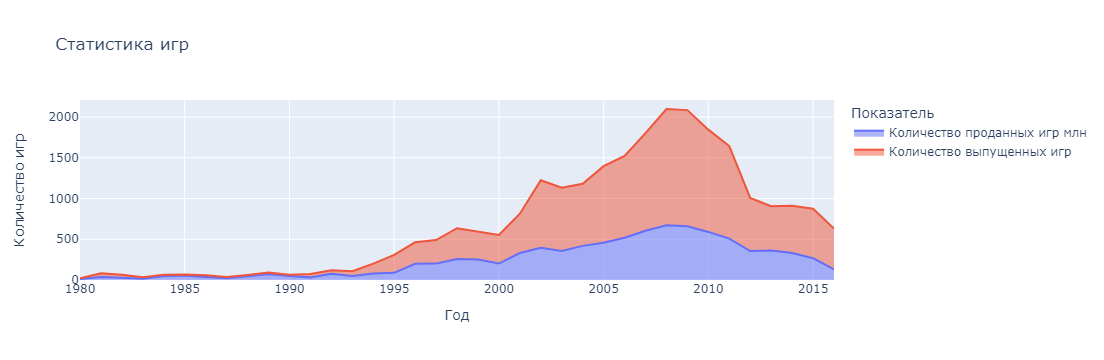

In [19]:
Sales = df.groupby('year_of_release')['total_sales'].sum().reset_index()
Sales.columns = ['year_of_release', 'total_sales']
Number = df.groupby('year_of_release')['name'].count().reset_index()
Number.columns = ['year_of_release', 'num_games']

# Объединение данных для удобства построения графика
merged_df = pd.merge(Sales, Number, on='year_of_release')

# Создание графика с помощью plotly.express
fig = px.area(merged_df, x='year_of_release', y=['total_sales', 'num_games'], labels={
    'year_of_release': 'Год',
    'value': 'Количество игр',
    'variable': 'Показатель'
}, title='Статистика игр')

# Переименование легенды
fig.for_each_trace(lambda t: t.update(name={'total_sales': 'Количество проданных игр млн', 'num_games': 'Количество выпущенных игр'}[t.name]))

# Показ графика
fig.show()

видно, что с 1995 года спрос на игры начал рости, данные до этого года можно считать неактуальными 

In [20]:
df = df.query('year_of_release>=1995')

In [21]:
total_leaders = df.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist()

In [22]:
total_leaders

['ds', 'wii', 'ps3', 'x360', 'ps2']

In [23]:
platforms_leaders = df.query('platform in @total_leaders')
platforms_leaders.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,e,28.91


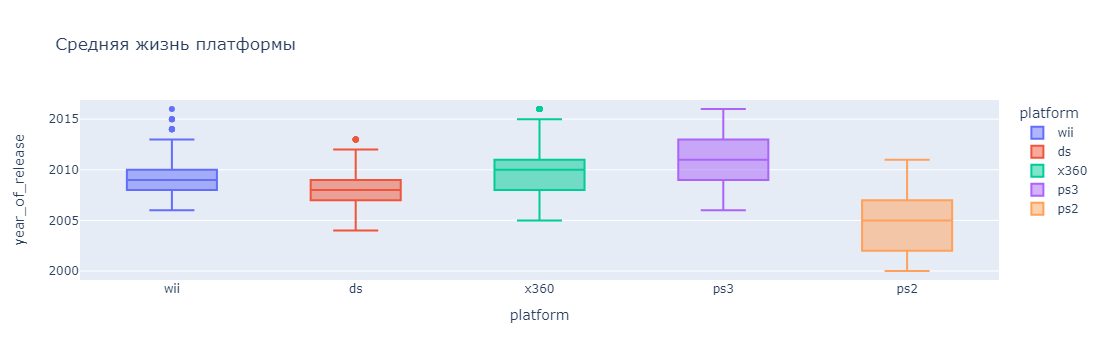

In [24]:
fig = px.box(platforms_leaders, x = "platform" , y = "year_of_release",color = 'platform',title='Средняя жизнь платформы')
fig.show()

Видно, что каждая из платформ 'прожила' в среднем по 10 лет

Wii 2006 - 2015 (9 лет)

DS с 2004 по 2013 (9 лет)

X360 с 2005 по 2015 (10 лет)

PS3 2006 - 2016 (10 лет)

PS2 с 2000 по 2010 (10 лет)

Возьмем данные за актуальный период

In [25]:
df = df.query('year_of_release>=2013')

In [26]:
total_leaders2013 = df.groupby('platform')['total_sales'].sum().sort_values()[-10:].index.tolist()

In [27]:
platforms_leaders2013 = df.query('platform in @total_leaders2013')

In [28]:
platforms_leaders2013.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,<NA>,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,<NA>,NaN,NaN,14.60
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62


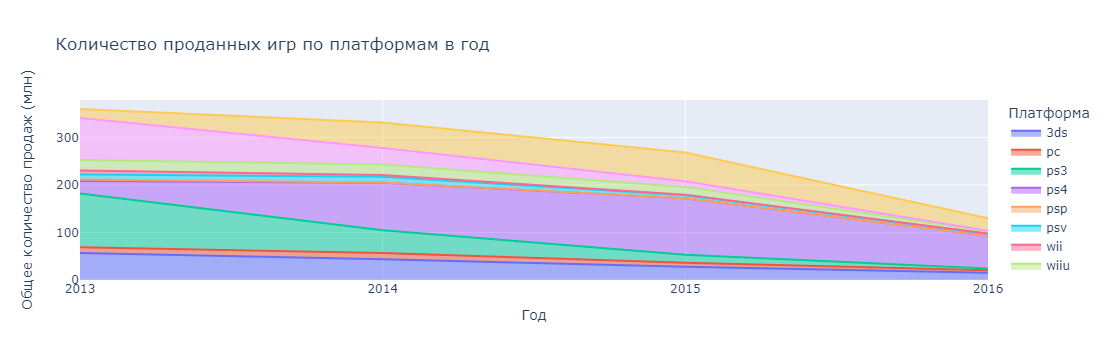

In [29]:
platform_sales = platforms_leaders2013.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Убедимся, что годы отображаются как целые числа
platform_sales['year_of_release'] = platform_sales['year_of_release'].astype(int)

# Создание графика с помощью plotly.express
fig = px.area(platform_sales, x='year_of_release', y='total_sales', color='platform', labels={
    'year_of_release': 'Год',
    'total_sales': 'Общее количество продаж (млн)',
    'platform': 'Платформа'
}, title='Количество проданных игр по платформам в год')

# Сортировка данных для правильного отображения
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

# Показ графика
fig.show()

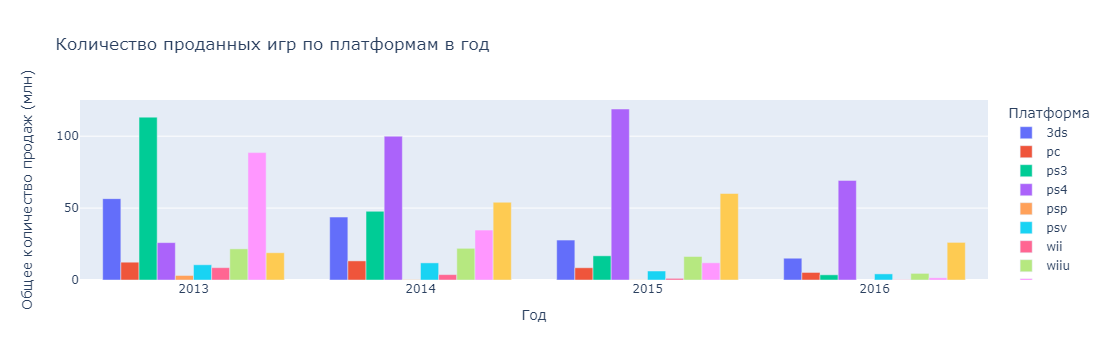

In [30]:
platform_sales = platforms_leaders2013.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Убедимся, что годы отображаются как целые числа
platform_sales['year_of_release'] = platform_sales['year_of_release'].astype(int)

# Создание столбчатого графика с помощью plotly.express
fig = px.bar(platform_sales, x='year_of_release', y='total_sales', color='platform', barmode='group', labels={
    'year_of_release': 'Год',
    'total_sales': 'Общее количество продаж (млн)',
    'platform': 'Платформа'
}, title='Количество проданных игр по платформам в год')

# Обновление макета
fig.update_layout(xaxis=dict(tickmode='linear', dtick=1))

# Показ графика
fig.show()

Видно, что продажи абсолютно всех платфор падают

Топ 3 прибыльные платформы это ps4, xone и 3ds

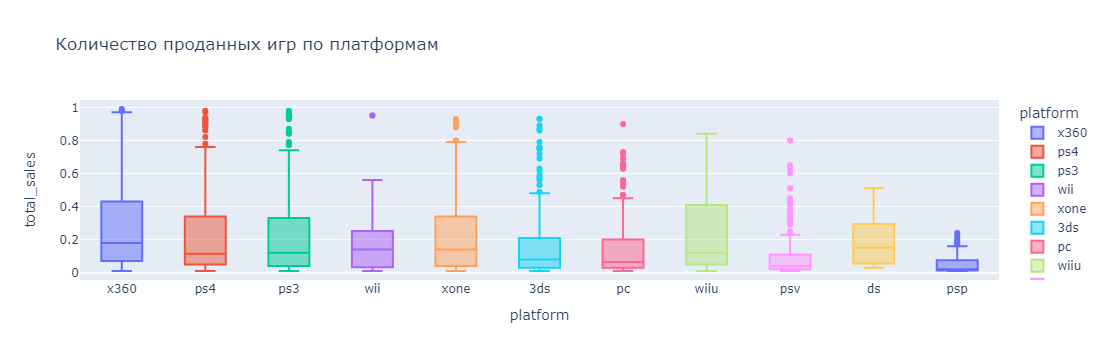

In [31]:
fig = px.box(df.query('total_sales<1'), x = "platform" , y = "total_sales",color = 'platform',title='Количество проданных игр по платформам')
fig.show()

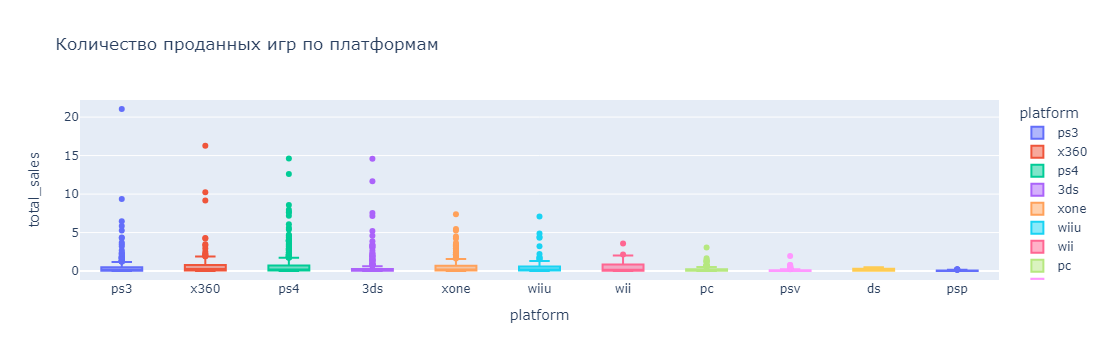

In [32]:
fig = px.box(df, x = "platform" , y = "total_sales",color = 'platform',title='Количество проданных игр по платформам')
fig.show()

Наибольшая медиана продаж у платформы x360, ps4 и хone догоняют.

У почти всех платформ есть игры, которые выбиваются за средние продажи, то есть 'хиты'

**Влияние отзывов на продажи**

In [33]:
def cor_m(data,platform):
    corrs=data[data.platform == platform][['total_sales', 'critic_score', 'user_score']].corr().round(3)
    figure = ff.create_annotated_heatmap(
        z=corrs.values,
        x=list(corrs.columns),
        y=list(corrs.index),
        annotation_text=corrs.round(3).values,
        showscale=True)
    figure.update_layout(
        width=400,  # desired width in pixels
        height=300  # desired height in pixels
    )
    return figure


def scatter(data,platform):
    df=data[data['platform'] == platform][['total_sales', 'critic_score', 'user_score']]
    df = df.dropna(subset=['critic_score', 'user_score', 'total_sales'])
    fig = px.scatter_matrix(df, dimensions=['total_sales', 'critic_score', 'user_score'], labels={
        'total_sales': 'Общее количество продаж (млн)',
        'critic_score': 'Оценка критиков',
        'user_score': 'Оценка пользователей'
    }, title=f'Scatter Matrix для платформы {platform}',width=700, height=700)
    
    # Показ графика
    fig.show()

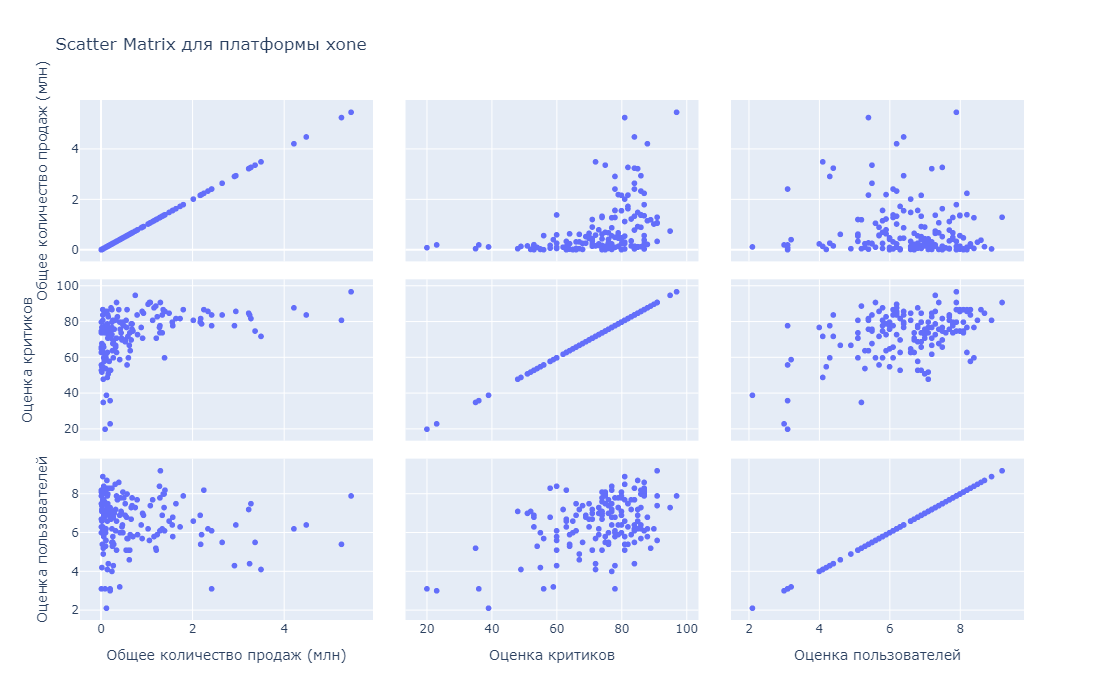

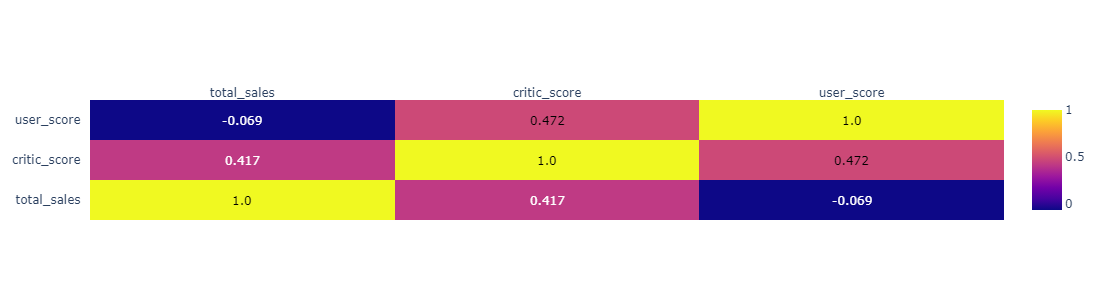

In [34]:
scatter(df,'xone')
cor_m(df,'xone')

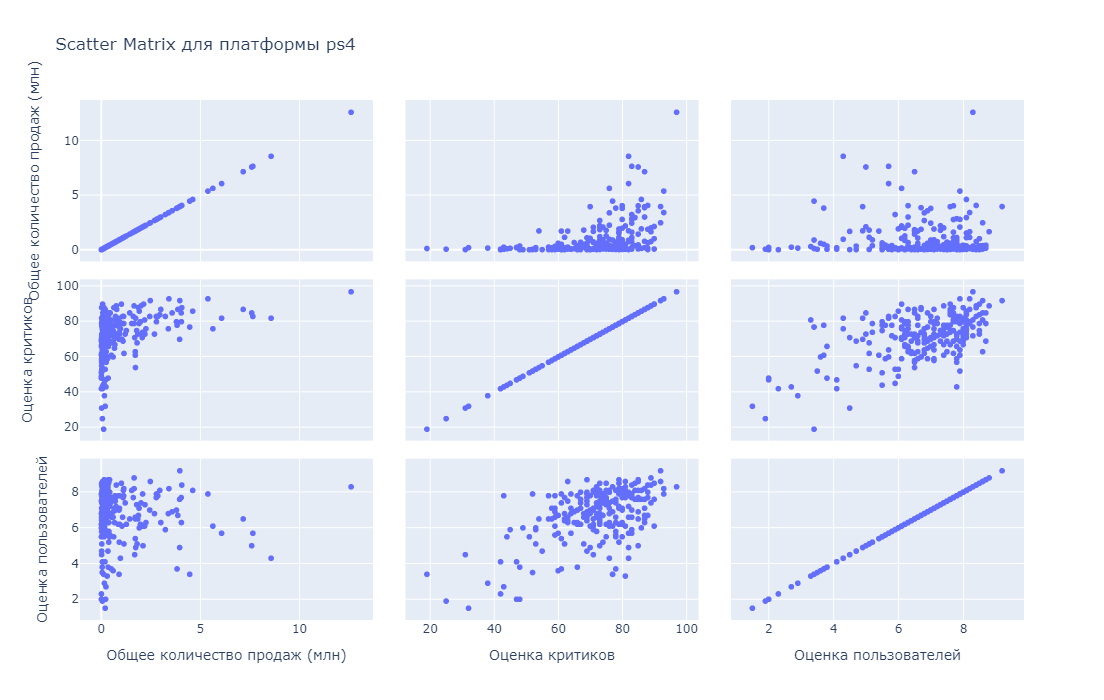

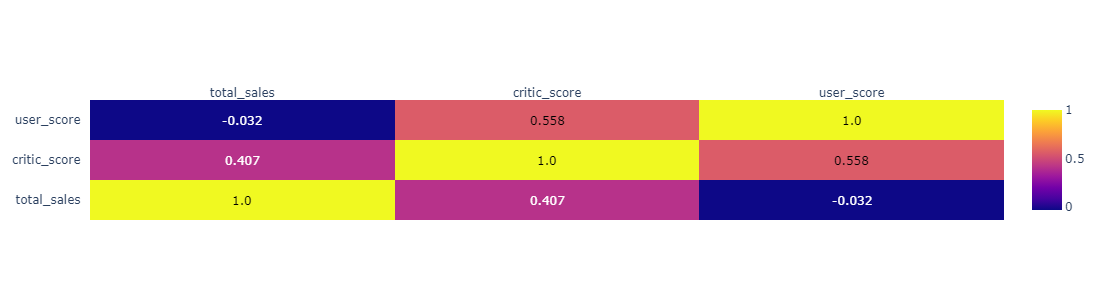

In [35]:
scatter(df,'ps4')
cor_m(df,'ps4')

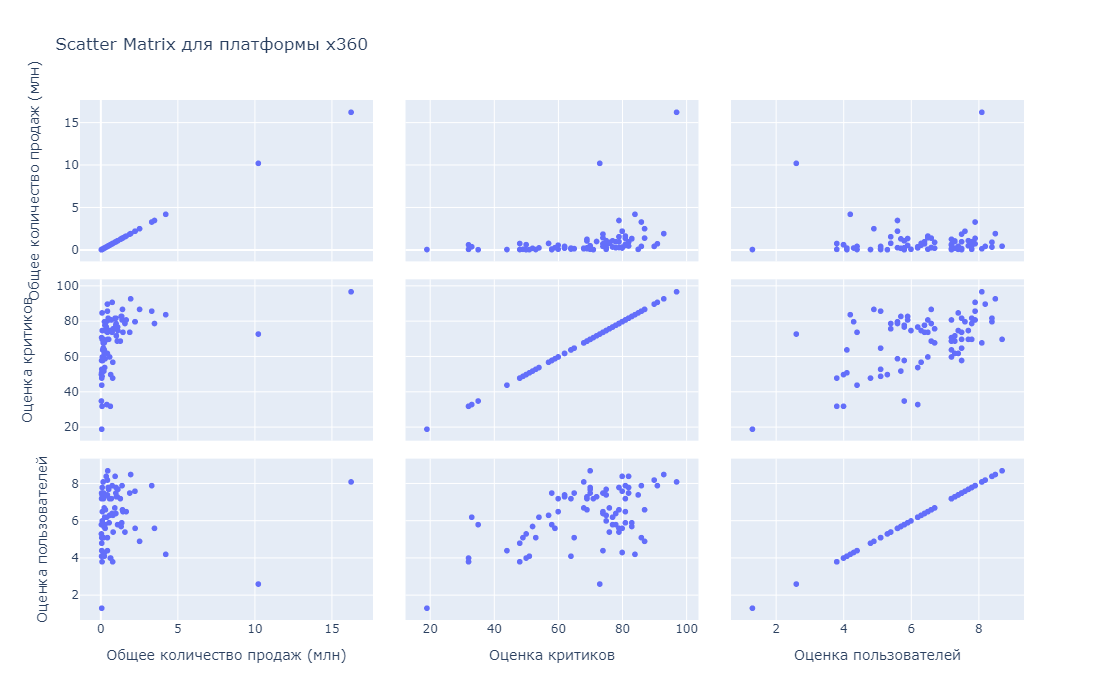

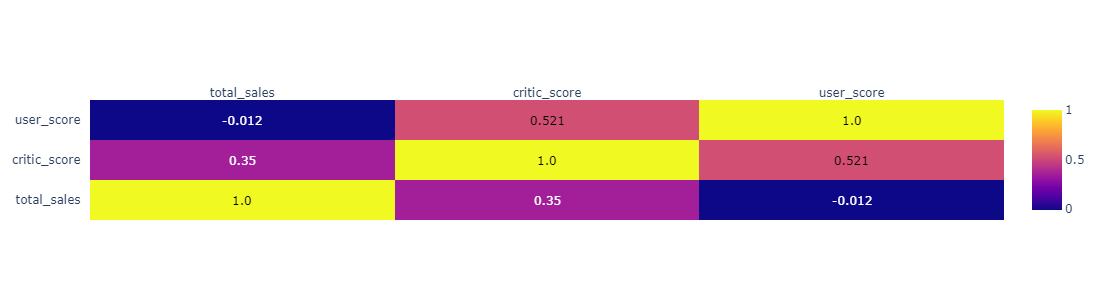

In [36]:
scatter(df,'x360')
cor_m(df,'x360')

По полученным данным, можно сказать, что отзывы обычных потребителей, почти никак не влияют на продажи игр, а вот отзывы критиков, все же имеют минимальный вес. Максимальная корреляция 0.4, что означает, что критики могут повлиять положительно на продажи игр.

**Смотрим самые популярные игровые жанры по продажам.**

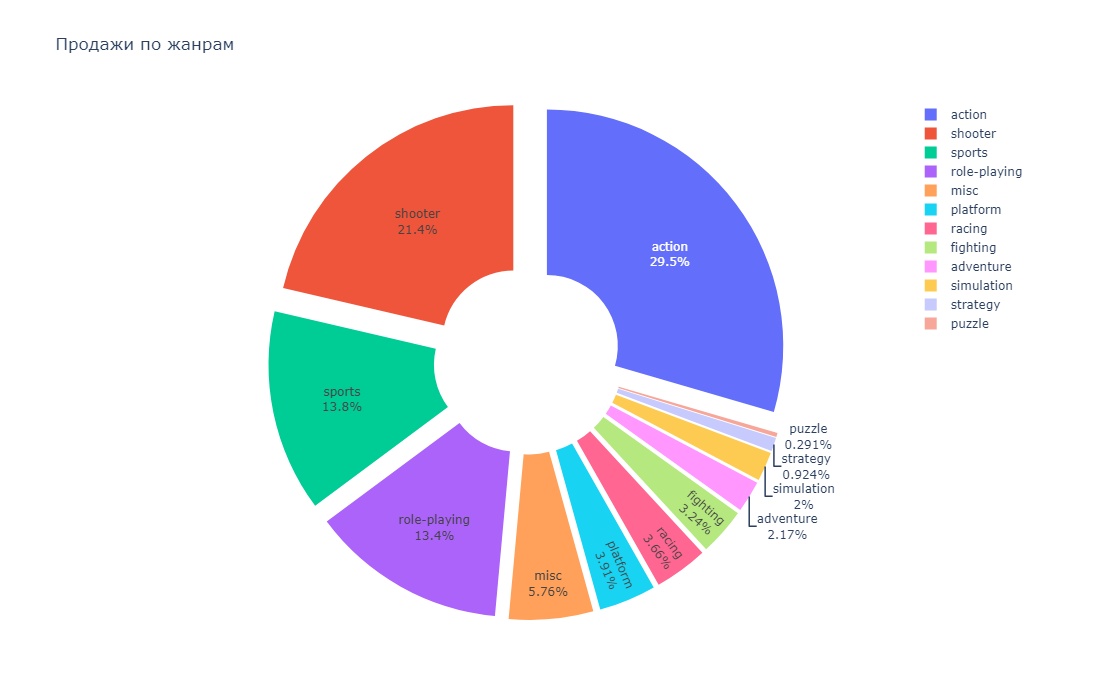

In [37]:
pivot_df = df.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='sum'
).reset_index()

# Строим круговую диаграмму с Plotly
fig = px.pie(
    pivot_df,
    names='genre',
    values='total_sales',
    title='Продажи по жанрам',
    hole=0.3,  # Для создания донатной диаграммы можно использовать hole
    width=700, 
    height=700
)

# Настройка отображения процентов
fig.update_traces(
    textinfo='label+percent',
    pull=[0.1]*len(pivot_df)  # Немного выделить каждую секцию
)

# Показываем график
fig.show()

In [38]:
df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
action,321.87
shooter,232.98
sports,150.65
role-playing,145.89
misc,62.82
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


самые популярные игры в жанре экшен и шутер, дальше идут спорт, ролвый, гонки, платформеры и тд.

самые неприбыльные жанры, это пазлы и стратегии

In [39]:
def plot_categ(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 7))
    count_sub = data[column].value_counts()
    count_sub.iplot(kind='bar', xTitle=ylabel, yTitle=xlabel,title=title)

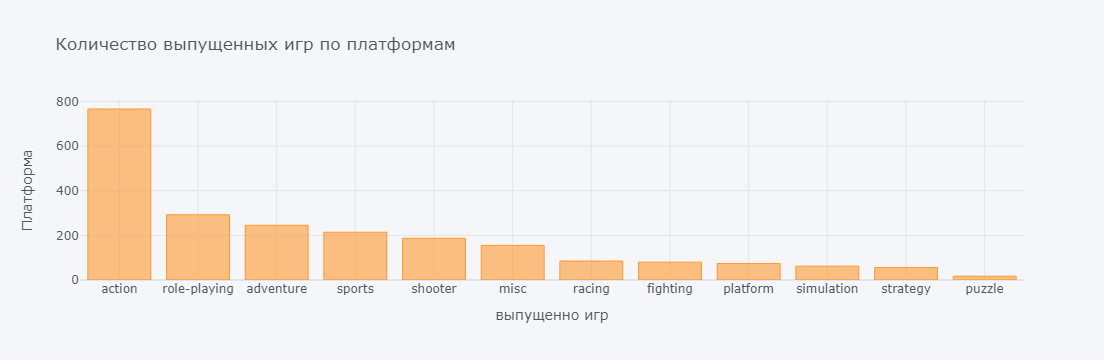

<Figure size 1200x700 with 0 Axes>

In [40]:
plot_categ(df,'genre','Количество выпущенных игр по платформам',"Платформа","выпущенно игр")

 посмотрев медианные значения по продажам, можно увидеть, что игры жанра шутер продаются лучше всего,можно сказать, что 
    
Самый стабильно прибыльный жанр - шутеры, он лидирует почти с 2х кратным отрывом от ближайшего жанра

Далее близко идут два жанра - спорт и платформеры

Популярность жанра экшн не сказалась на количестве продаж таких игр, они делят место с играми жанра misc и файтингами

Игры в жанре приключений наименее продаваемые


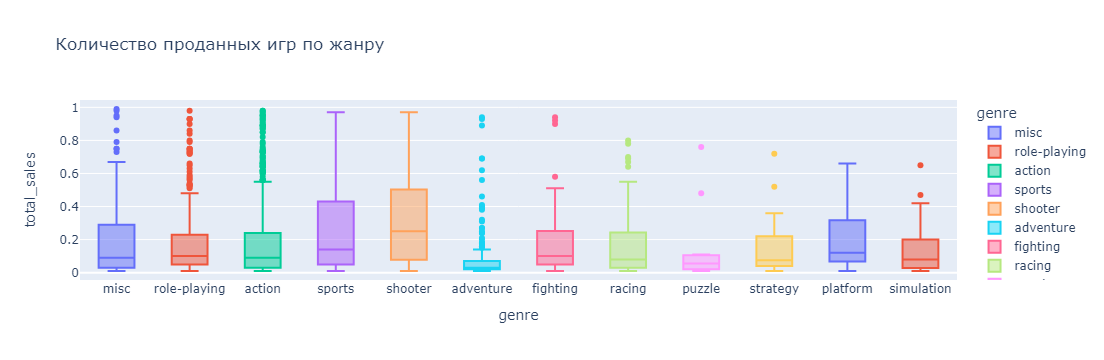

Средние продажи


,total_sales
genre,
shooter,1.245882
sports,0.703972
platform,0.576081
role-playing,0.499623
racing,0.469294
fighting,0.441375
action,0.420196
misc,0.405290
simulation,0.350968


Медианные продажи


,total_sales
genre,
shooter,0.450000
sports,0.240000
platform,0.225000
role-playing,0.125000
fighting,0.125000
racing,0.120000
action,0.110000
simulation,0.100000
misc,0.100000


In [41]:
fig = px.box(df.query('total_sales<1'), x = "genre" , y = "total_sales",color = 'genre',title='Количество проданных игр по жанру')
fig.show()
print('Средние продажи')
display(df.groupby('genre')[['total_sales']].mean().sort_values('total_sales', ascending=False).style.bar())
print('Медианные продажи')
display(df.groupby('genre')[['total_sales']].median().sort_values('total_sales', ascending=False).style.bar())

## Шаг 4. Составьте портрет пользователя каждого региона

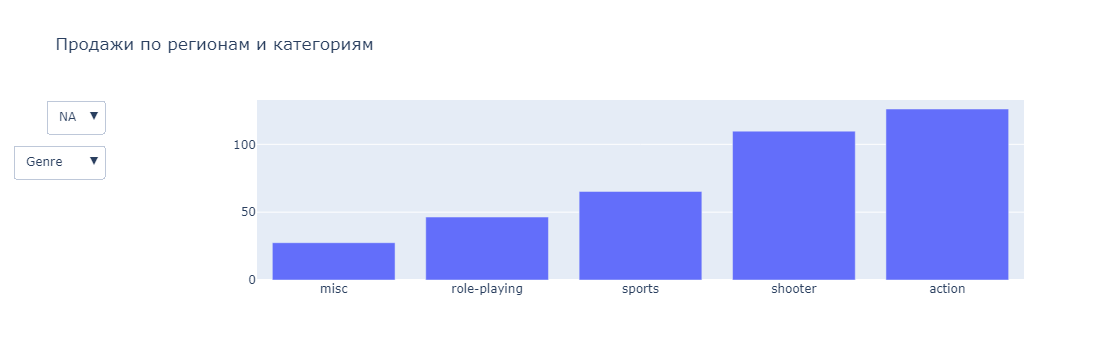

In [42]:
def create_traces(column):
    traces = []
    for region in ["na", "eu", "jp"]:
        traces.append(
            go.Bar(
                x=df.groupby(column)[region+'_sales'].sum().sort_values()[-5:].index.tolist(), 
                y=df.groupby(column)[region+'_sales'].sum().sort_values()[-5:],
                name=f'{region}_{column}',
                visible=(region == 'na' and column == 'genre')
            )
        )
    return traces

# Создаем traces для жанров и платформ
traces_genre = create_traces('genre')
traces_platform = create_traces('platform')

# Объединяем все traces
traces = traces_genre + traces_platform

layout = go.Layout(
    title="Продажи по регионам и категориям",
    updatemenus=[
        dict(
            x=-0.2,
            y=1,
            yanchor='top',
            buttons=[
                dict(
                    args=[{'visible': [True, False, False, False, False, False]}],
                    label='NA',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False, True, False, False, False, False]}],
                    label='EU',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False, False, True, False, False, False]}],
                    label='JP',
                    method='update'
                )
            ],
        ),
        dict(
            x=-0.2,
            y=0.75,
            yanchor='top',
            buttons=[
                dict(
                    args=[{'visible': [True, False, False, False, False, False]}],
                    label='Genre',
                    method='update'
                ),
                dict(
                    args=[{'visible': [False, False, False, True, False, False]}],
                    label='Platform',
                    method='update'
                )
            ],
        )
    ]
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

Пользователи Северной Америки больше всего предпочитают Xbox360, потому что консоль американская и доступная.

У жителей европы поуялрна x360, и ps4

Жителям Северной Америки, очень нравится играть в шутеры

Жители Японии очень любят играть в ролевые игры, не смотря на то, что в других регионах это непопулярный жанр

Европейцы любят похожие жанры, что и Северо-Американцы, шутеры и спортивные игры

**Вывод** Регион влияет на продажи игр по жанрам, и по типам платформ, особенно это заметно на примере Японии с другими регионами

In [43]:
df['rating'].fillna(value= 'e' , inplace= True )
ESRB = df.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
ESRB.head(10)

,eu_sales,jp_sales,na_sales
rating,,,
e,162.27,100.19,168.47
e10+,42.69,5.89,54.24
m,145.32,14.11,165.21
t,41.95,20.59,49.79


Да, рейтинг влияет на продажи в отдельных регионах. В Европе и Северной Америке, рейтинг игр похож, в то время, когда в японии другие предпочтения.

## Шаг 5. Проверьте гипотезы

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [44]:
sample_1 = df.loc[df['platform']=="xone",'user_score'].dropna() 
sample_2 = df.loc[df['platform']=="pc",'user_score'].dropna()
print("               Дисперсия Xbox One - {:.2f};                                           Дисперсия PC - {:.2f};\n\nДисперсии отличаются на: {:.2%}"
      .format(sample_1.var(),  sample_2.var(), sample_2.var()/sample_1.var() -1))

               Дисперсия Xbox One - 1.91;                                           Дисперсия PC - 3.04;

Дисперсии отличаются на: 59.20%


раззличие довольно большое, будем считать дисперсии разными

In [45]:
alpha = 0.05 

results = st.ttest_ind(sample_1, sample_2,equal_var = False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


не удалось опровергнуть нулевую гипотезу, значит средние оценки xbox one и pc не имеют статистически значимых отличий.

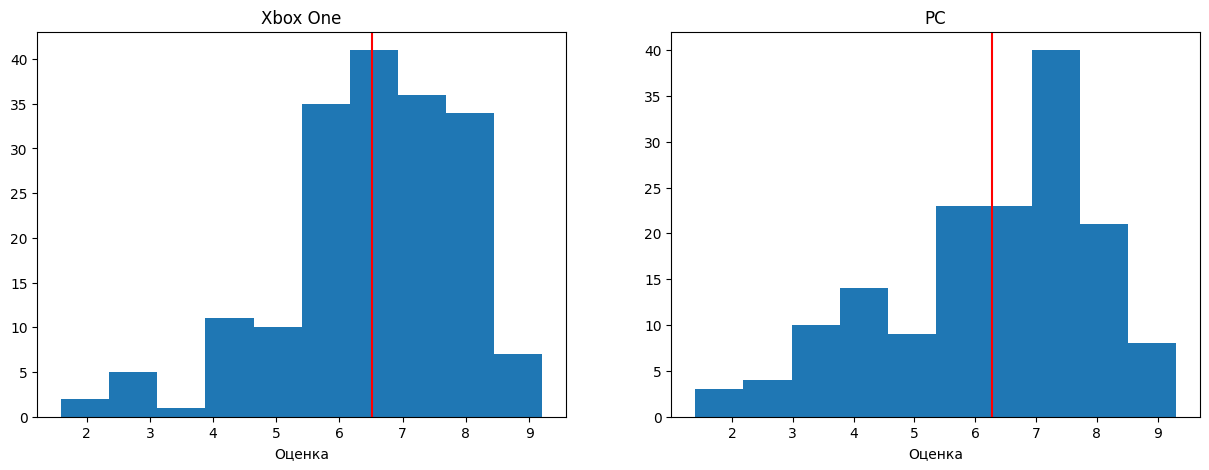

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.hist(sample_1)
ax1.axvline(x=sample_1.mean(),color='red')
ax1.set_title("Xbox One")
ax1.set_xlabel("Оценка")
ax2.hist(sample_2)
ax2.axvline(x=sample_2.mean(),color='red')
ax2.set_title("PC")
ax2.set_xlabel("Оценка")

plt.show()


In [47]:
sample_3 = df[df['genre']=="action"]['user_score'].dropna()
sample_4 = df[df['genre']=="sports"]['user_score'].dropna()
print("               Дисперсия Action - {:.2f};                                           Дисперсия Sports - {:.2f};\n\nДисперсии отличаются на: {:.2%}"
      .format(sample_3.var(),  sample_4.var(), sample_4.var()/sample_3.var() -1))

               Дисперсия Action - 1.77;                                           Дисперсия Sports - 3.18;

Дисперсии отличаются на: 79.76%


раззличие довольно большое, будем считать дисперсии разными

Ho - средние оценки пользователей жанров Action и Sports равны

H1 - средние оценки жанров Action и Sports отличаются

In [48]:
alpha = 0.05 

results_2 = st.ttest_ind(
    sample_3, 
    sample_4,
    equal_var = False)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704318e-20
Отвергаем нулевую гипотезу


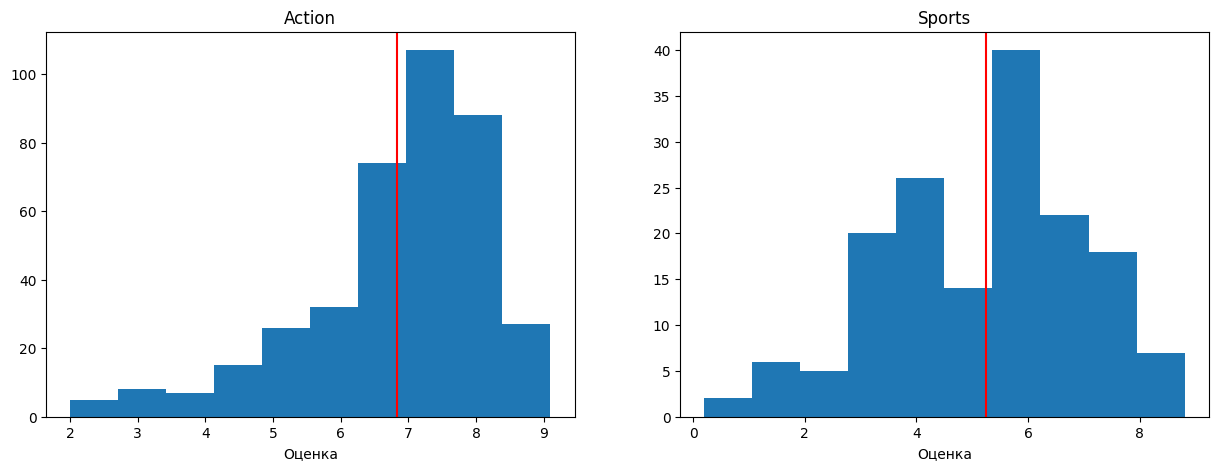

In [49]:
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15,5))

ax3.hist(sample_3)
ax3.axvline(x=sample_3.mean(),color='red')
ax3.set_title("Action")
ax3.set_xlabel("Оценка")
ax4.hist(sample_4)
ax4.axvline(x=sample_4.mean(),color='red')
ax4.set_title("Sports")
ax4.set_xlabel("Оценка")

plt.show()


нулевая гипотеза не подтвердилась, значит оценки жанров Action и Sports  с большей долей вероятности будут иметь статистически значимые отличия.


## Шаг 6. Общий вывод

**Данные**

    Много игр, у которых отсутсвуют оценки пользователей и критиков, 6701 и 8578 пропусков соответственно. А так же нет 6766 строк информации о возрастном рейтинге игры

    Заменили значения tbd у оценок пользователей, заменили его на пропущенные.
    
    Удалили строки который дублировались по трем столбцам(год выпуска, платформа, название)
    
**Исследовательский анализ данных**

    Резкий рост выпуска игр приходится c 1995 года,  а пик на 2008-2009 гг.

    Средний срок жизни платформы - 10 лет

    3 потенциально прибыльных платформ - PS4, Xbox one, 3DS

    Наибольшие медианные продажи у платформы X360

    Почти у всех платформ есть определенные игры, которые выбиваются по продажам, "хиты"

    Оценки критиков слабо влияют на общие продажи, оценки пользователей не влияют совсем

    Больше всего игр жанра Action, затем идут Sports, misc и adventure

    Лучше всего покупают игры жанра Shooter, Platforms и Sports идёт на втором месте

    Adventure сильно отстаёт по продажам, хотя игр выпускается много
    
**Портрет пользователя**

    В NA самая популярная платформа XBOX. Европейцы предпочитают Playstation. В Японии популярны DS

    В NA и EU самые популярные жанры практически совпадают. В JP вкусы сильно отличаются

    Рейтинг ESRB, по разному может влиять на продажи в разных регионах, особенно в Японии

**Гипотезы**

    Средние пользовательские рейтинги платформ Xbox One и PC с большей долей вероятности не имеют статистичиски значимых 
    различий. Гипотеза подтвердилась

    Средние пользовательские рейтинги жанров Action и Sports с большей долей вроятности имеют статистичиски значимые 
    различия. Гипотеза подтвердилась